<a href="https://colab.research.google.com/github/innosevda/Barcode-Detection/blob/main/Barcode_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python matplotlib pyzbar


In [ ]:
!apt-get install -y libzbar0

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x libfftw3-bin
  libfftw3-dev inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-doub


# **The code below is the original barcode detection code without doing any further tasks**

In [ ]:
import os
import cv2
from pyzbar.pyzbar import decode
import matplotlib.pyplot as plt

# Function to detect, decode, and locate barcodes
def detect_and_locate_barcode(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    barcodes = decode(gray)

    # Loop through each detected barcode
    for barcode in barcodes:
        # Decode barcode data
        barcode_data = barcode.data.decode("utf-8")
        barcode_type = barcode.type

        # Print barcode data and type
        print("Barcode Data:", barcode_data)
        print("Barcode Type:", barcode_type)

        # Get the location (rectangle) of the barcode
        (x, y, w, h) = barcode.rect

        # Print the barcode location coordinates
        print(f"Barcode Location: x={x}, y={y}, width={w}, height={h}")

        # Draw a rectangle around the barcode
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Add barcode data and type as text on the image
        cv2.putText(image, f"{barcode_data} ({barcode_type})",
                    (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Convert the image to RGB (for Matplotlib display)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image with detected barcode and rectangle
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Process all JPEG images in the barcode_dataset folder
for filename in os.listdir('chosenbarcodes_dataset'): #rename accordingly
    if filename.endswith('.jpeg'):
        image_path = os.path.join('chosenbarcodes_dataset', filename) #rename accordingly
        image = cv2.imread(image_path)
        detect_and_locate_barcode(image)


# The code below does thresholding and cropping

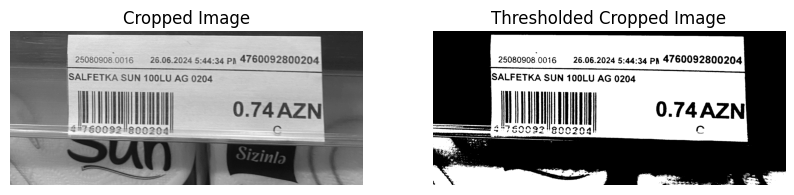

Cropped image saved as: cropped_images/1 (40).jpeg_cropped.png
Thresholded image saved as: thresholded_images/1 (40).jpeg_thresholded.png


In [ ]:
#SLIGHTLY CHANGED CODE

import cv2
import numpy as np
import os
from pyzbar.pyzbar import decode
import matplotlib.pyplot as plt

# Function to detect barcode, crop, and threshold the image
def detect_and_process_price_tag(image, filename, cropped_folder="cropped_images", thresholded_folder="thresholded_images", scale_factor=5, threshold_value=150):
    # Ensure output folders exist
    if not os.path.exists(cropped_folder):
        os.makedirs(cropped_folder)
    if not os.path.exists(thresholded_folder):
        os.makedirs(thresholded_folder)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect barcodes in the image
    barcodes = decode(gray)

    if barcodes:
        # Get the bounding box of the first barcode detected
        barcode = barcodes[0]
        (x, y, w, h) = barcode.rect

        # Calculate scaled margins for the width and height
        expanded_width = int(w * (scale_factor - 1) / 2)
        expanded_height = int(h * (scale_factor - 1) / 2)

        # Calculate coordinates for the expanded area (imageX)
        x_min = max(x - expanded_width, 0)
        x_max = min(x + w + expanded_width, image.shape[1])
        y_min = max(y - expanded_height, 0)
        y_max = min(y + h + expanded_height, image.shape[0])

        # Crop the expanded area (imageX)
        cropped_image = gray[y_min:y_max, x_min:x_max]

        # Save the cropped image
        cropped_path = os.path.join(cropped_folder, f"{filename}_cropped.png")
        cv2.imwrite(cropped_path, cropped_image)

        # Apply thresholding to get a binary image (imageBW)
        _, thresholded_image = cv2.threshold(cropped_image, threshold_value, 255, cv2.THRESH_BINARY)

        # Save the thresholded image
        thresholded_path = os.path.join(thresholded_folder, f"{filename}_thresholded.png")
        cv2.imwrite(thresholded_path, thresholded_image)

        # Display the cropped and thresholded images
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cropped_image, cmap='gray')
        plt.title("Cropped Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(thresholded_image, cmap='gray')
        plt.title("Thresholded Cropped Image")
        plt.axis('off')
        plt.show()

        print(f"Cropped image saved as: {cropped_path}")
        print(f"Thresholded image saved as: {thresholded_path}")

    else:
        print(f"No barcode found in the image: {filename}")

# Loop through each image in the 'dataset' folder
def process_images_from_folder(input_folder="dataset", cropped_folder="cropped_images", thresholded_folder="thresholded_images", scale_factor=5, threshold_value=150):
    # Check if the input folder exists
    if not os.path.exists(input_folder):
        print(f"Error: Input folder '{input_folder}' does not exist.")
        return

    # Loop through each image file in the folder
    for filename in os.listdir(input_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for valid image file extensions
            img_path = os.path.join(input_folder, filename)

            # Read the image from the file
            image = cv2.imread(img_path)

            if image is not None:
                # Process the image
                detect_and_process_price_tag(image, filename, cropped_folder, thresholded_folder, scale_factor, threshold_value)
            else:
                print(f"Error: Unable to read image {filename}")

# Run the function on the dataset folder
process_images_from_folder(input_folder="dataset", cropped_folder="cropped_images", thresholded_folder="thresholded_images")


**masking that on the cropped images before thresholded**

In [ ]:
# Install pytesseract and tesseract-ocr
!pip install pytesseract
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,266 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 123623 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:
!pip install pyzbar


In [ ]:
!apt-get install -y libzbar0


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x libfftw3-bin
  libfftw3-dev inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-doub

# TEXT DETECTION AND RECOGNITION USING OPENCV AND OCR

OCR Text Detected: WIN) 0742

Detected Price: 0742


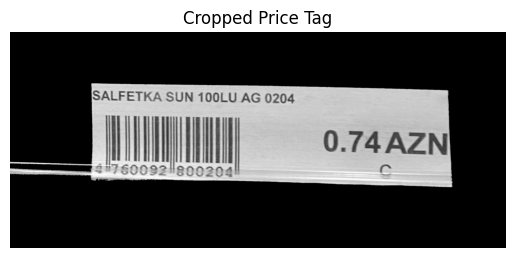

In [ ]:

import cv2
import pytesseract
import re
import numpy as np
import matplotlib.pyplot as plt
from pyzbar.pyzbar import decode  # Import the decode function

def process_and_save_cropped_price_tag(image, scale_factor=5, threshold_value=150):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    barcodes = decode(gray)

    if barcodes:
        barcode = barcodes[0]
        (x, y, w, h) = barcode.rect

        expanded_width = int(w * (scale_factor - 1) / 2)
        expanded_height = int(h * (scale_factor - 1) / 2)

        x_min = max(x - expanded_width, 0)
        x_max = min(x + w + expanded_width, image.shape[1])
        y_min = max(y - expanded_height, 0)
        y_max = min(y + h + expanded_height, image.shape[0])

        imageX = gray[y_min:y_max, x_min:x_max]
        _, imageBW = cv2.threshold(imageX, threshold_value, 255, cv2.THRESH_BINARY)

        contours, _ = cv2.findContours(imageBW, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        largest_contour = max(contours, key=cv2.contourArea)
        mask = np.zeros_like(imageBW)
        cv2.drawContours(mask, [largest_contour], -1, (255), thickness=cv2.FILLED)
        price_tag_area = cv2.bitwise_and(imageX, imageX, mask=mask)

        # Save images for inspection
        cv2.imwrite("cropped_price_tag.png", price_tag_area)
        cv2.imwrite("thresholded_price_tag.png", imageBW)

        # OCR only on the cropped price tag area
        ocr_text = pytesseract.image_to_string(price_tag_area, config='--psm 6')
        print("OCR Text Detected:", ocr_text)

        price_match = re.search(r'(\d+)\.?\d{2}', ocr_text)
        if price_match:
            detected_price = price_match.group(0)
            print(f"Detected Price: {detected_price}")
        else:
            print("No valid price detected.")

        plt.imshow(price_tag_area, cmap='gray')
        plt.title("Cropped Price Tag")
        plt.axis('off')
        plt.show()

    else:
        print("No barcode found in the image.")

# Load your image
image_path = '/content/1 (40).jpeg'  # Replace with your uploaded image path
image = cv2.imread(image_path)
process_and_save_cropped_price_tag(image, scale_factor=5)
